In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from warnings import filterwarnings
from sklearn.cluster import KMeans
from skimage.feature import corner_harris, corner_peaks
filterwarnings("ignore")

##### reading lena image and splitting into R, G and B channels

In [4]:
lena = cv2.imread("images/Lena.bmp")
b_lena, g_lena, r_lena = cv2.split(lena)
b_lena = b_lena.astype(np.double)
g_lena = g_lena.astype(np.double)
r_lena = r_lena.astype(np.double)

## 1.1.1

##### Calculating H, S and V

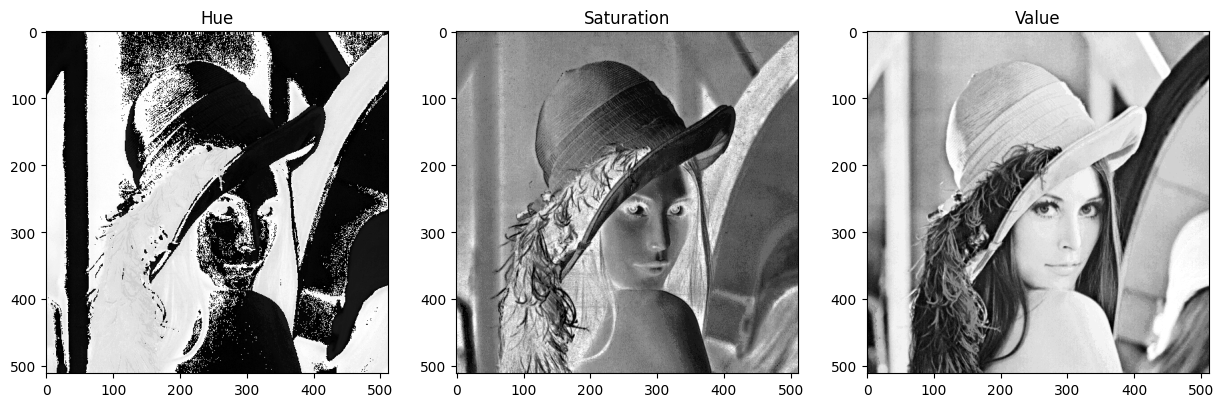

In [18]:
def calculate_HSV(r, g, b):
    width, height = r.shape
    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = np.zeros_like(r)
    for i in range(width):
        for j in range(height):
            M = max(r[i, j], g[i, j], b[i, j])
            m = min(r[i, j], g[i, j], b[i, j])
            c = M - m
            # print(c)
            v[i, j] = M
            s[i, j] = (c / v[i, j])
                
            if M == r[i, j] and c != 0:
                h[i, j] = (((g[i, j] - b[i, j]) / c) % 6) * 60
            elif M == g[i, j] and c != 0:
                h[i, j] = (((b[i, j] - r[i, j]) / c) + 2) * 60
            elif M == b[i, j] and c != 0:
                h[i, j] = (((r[i, j] - g[i, j]) / c) + 4) * 60
            elif c == 0:
                h[i, j] = 0
    return h, s, v
h, s, v = calculate_HSV(r_lena, g_lena, b_lena)
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
axis[0].imshow(h, cmap="gray")
axis[0].set_title("Hue")
axis[1].imshow(s, cmap="gray")
axis[1].set_title("Saturation")
axis[2].imshow(v, cmap="gray")
axis[2].set_title("Value")
# plt.imshow(v, cmap="gray")
plt.show()

## 1.1.2

##### YIQ color space

- Y: represents brightness
- I and Q: represent chromaticity

- Y = 0.299R + 0.587G + 0.114B
- I = 0.596R - 0.274G - 0.322B
- Q = 0.211R - 0.523G + 0.312*B

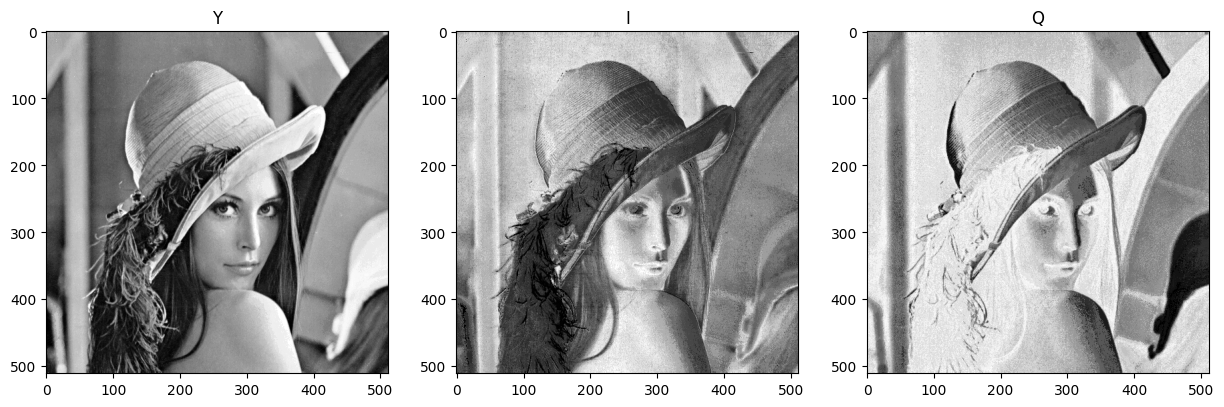

In [20]:
# calculatin Y, I and Q for lena

y_lena = 0.299 * r_lena + 0.58 * g_lena + 0.114 * b_lena
i_lena = 0.596 * r_lena - 0.274 * g_lena - 0.322 * b_lena
q_lena = 0.211 * r_lena - 0.523 * g_lena + 0.312 * b_lena
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
axis[0].imshow(y_lena, cmap="gray")
axis[0].set_title("Y")
axis[1].imshow(i_lena, cmap="gray")
axis[1].set_title("I")
axis[2].imshow(q_lena, cmap="gray")
axis[2].set_title("Q")
# plt.imshow(v, cmap="gray")
plt.show()

- r = y + 0.956*i + 0.621*q
- g = y - 0.272*i - 0.647*q
- b = y - 1.106*i + 1.703*q

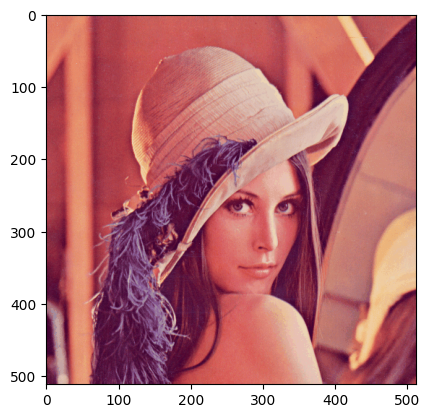

In [21]:
# returning to RGB

r = y_lena + 0.956*i_lena + 0.621*q_lena
g = y_lena - 0.272*i_lena - 0.647*q_lena
b = y_lena - 1.106*i_lena + 1.703*q_lena

img = np.stack((r, g, b), axis=2)
img = img.astype(np.uint8)
plt.imshow(img)
plt.show()


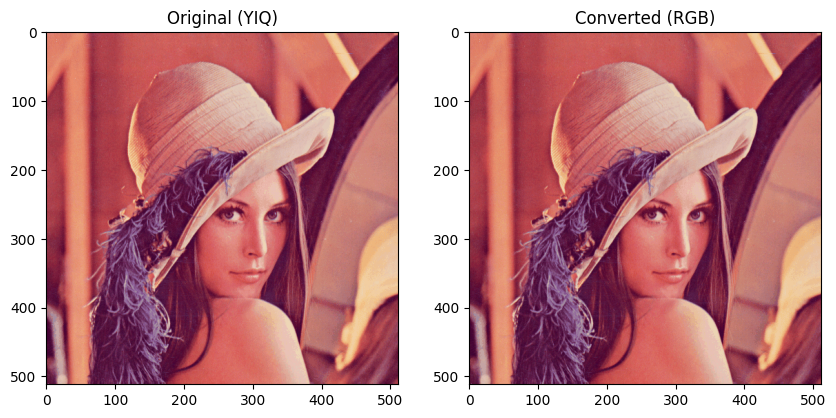

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load an image in YIQ color space
img_yiq = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

# Split the image into Y, I, Q channels
y, i, q = (y_lena, i_lena, q_lena)

# Convert the YIQ channels to RGB channels
r = y + 0.956*i + 0.621*q
g = y - 0.272*i - 0.647*q
b = y - 1.106*i + 1.703*q

# Merge the RGB channels back into a single image
img_rgb = np.stack([r, g, b], axis=2)
img_rgb = img_rgb.astype(np.uint8)
# Display the original YIQ image and the converted RGB image side by side using pyplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img_yiq)
axs[0].set_title('Original (YIQ)')
axs[1].imshow(img_rgb)
axs[1].set_title('Converted (RGB)')
plt.show()

### 1.2.1

In [2]:
# loading baboon image

baboon = cv2.imread("images/Baboon.bmp")
baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)
baboon.shape

(512, 512, 3)

##### 32 colors

In [25]:
# converting (512, 512, 3) image to (262144, 3) array

data_set = np.reshape(baboon, (262144, 3))

kmeans = KMeans(n_clusters=32, random_state=42)
kmeans.fit(data_set)

KMeans(n_clusters=32, random_state=42)

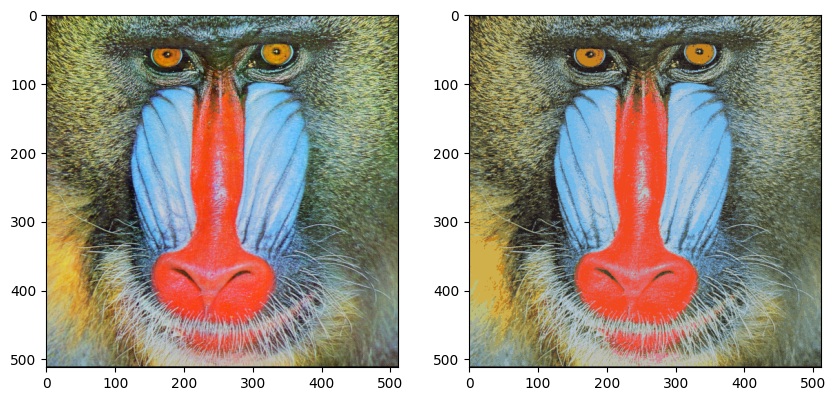

In [26]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

##### 16 colors

In [28]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(data_set)

KMeans(n_clusters=16, random_state=42)

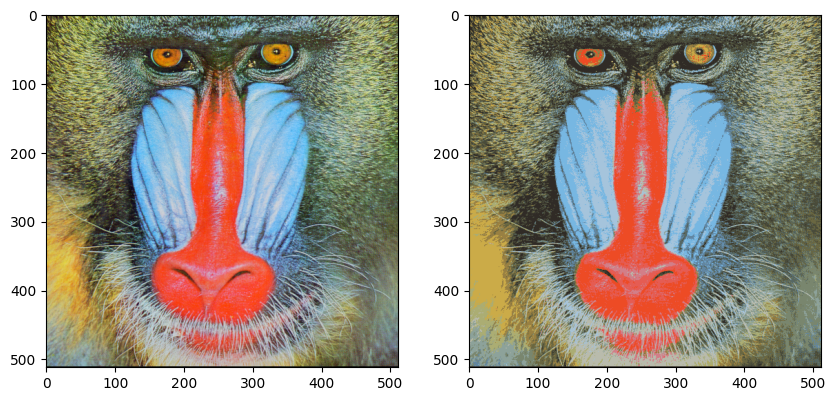

In [29]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

##### 8 colors

In [30]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_set)

KMeans(random_state=42)

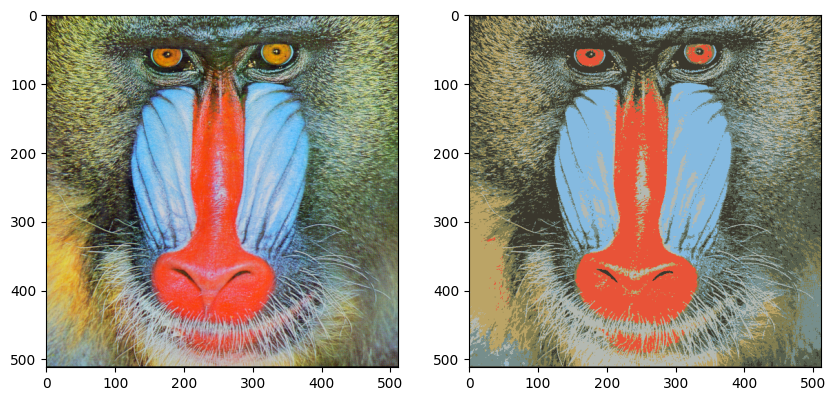

In [31]:
new_baboon = [kmeans.cluster_centers_[kmeans.labels_[i]] for i in range(len(kmeans.labels_))]
new_baboon = np.array(new_baboon)
new_baboon = new_baboon.astype(np.uint8)
new_baboon = np.reshape(new_baboon, (512, 512, 3))
# plt.imshow(new_baboon)
# plt.show()
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(baboon)
axis[1].imshow(new_baboon)
plt.show()

### 2.1.1

In [11]:
def harris(image, window_size=7, threshold=0.01, min_distance=2):
    Ix, Iy = np.gradient(image)
    
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy

    Sxx = cv2.boxFilter(Ix2, -1, (window_size, window_size))
    Syy = cv2.boxFilter(Iy2, -1, (window_size, window_size))
    Sxy = cv2.boxFilter(Ixy, -1, (window_size, window_size))

    det = Sxx * Syy - Sxy ** 2
    trace = Sxx + Syy

    harris_response = det - 0.04 * trace ** 2
    corners1 = np.where(harris_response > threshold * harris_response.max())
    corners2 = corner_peaks(harris_response, threshold_rel=threshold, min_distance=min_distance)
    return corners1, corners2

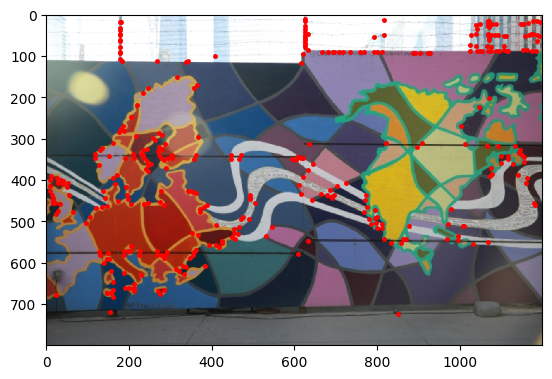

In [33]:
# scale 200
scale = 2
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/harris.JPG')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]
img = cv2.resize(img, (0, 0), fx=scale, fy=scale)
img2 = cv2.resize(img2, (0, 0), fx=scale, fy=scale)

corners1, corners2 = harris(img, threshold=0.02)
# corner_peaks(t)
# img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# img2[corners1] = [0, 255, 0]


# corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img2, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners2[:, 1], corners2[:, 0], '.r', markersize=5)
plt.show()

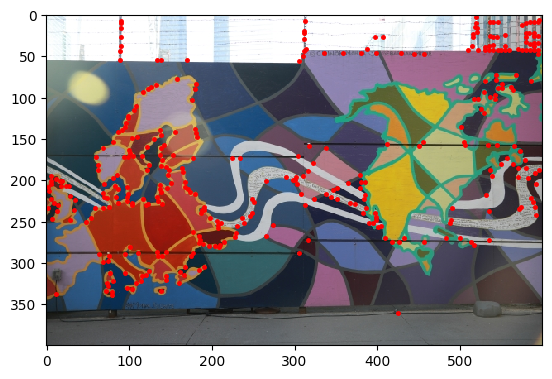

In [29]:
# scale 100 %
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/harris.JPG')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

corners1, corners2 = harris(img, threshold=0.02)
# corner_peaks(t)
# img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# img2[corners1] = [0, 255, 0]


# corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img2, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners2[:, 1], corners2[:, 0], '.r', markersize=5)
plt.show()

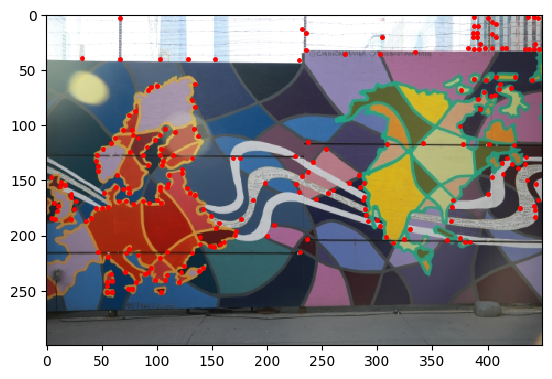

In [30]:
# scale 75%
scale = 0.75
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/harris.JPG')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]
img = cv2.resize(img, (0, 0), fx=scale, fy=scale)
img2 = cv2.resize(img2, (0, 0), fx=scale, fy=scale)

corners1, corners2 = harris(img, threshold=0.02)
# corner_peaks(t)
# img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# img2[corners1] = [0, 255, 0]


# corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img2, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners2[:, 1], corners2[:, 0], '.r', markersize=5)
plt.show()

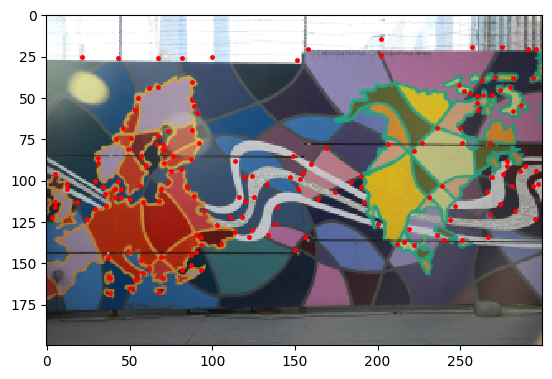

(171, 2)

In [32]:
# scale 50%
scale = 0.5
img = cv2.imread('images/harris.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images/harris.JPG')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]
img = cv2.resize(img, (0, 0), fx=scale, fy=scale)
img2 = cv2.resize(img2, (0, 0), fx=scale, fy=scale)

corners1, corners2 = harris(img, threshold=0.02)
# corner_peaks(t)
# img_with_corners = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# img2[corners1] = [0, 255, 0]


# corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img2, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners2[:, 1], corners2[:, 0], '.r', markersize=5)
plt.show()

### 2.2.2

In [40]:
def panorama(img_right, img_left):
    img1 = cv2.cvtColor(img_right,cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img_left,cv2.COLOR_BGR2GRAY)

    # surf = cv2.xfeatures2d.SIFT_create()
    # kp1, des1 = surf.detectAndCompute(img1,None)
    # kp2, des2 = surf.detectAndCompute(img2,None)
    
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    good = []
    for m in matches:
        if (m[0].distance < 0.5*m[1].distance):
            good.append(m)
    matches = np.asarray(good)
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
    dst = cv2.warpPerspective(img_right,H,((img_right.shape[1] + img_left.shape[1]), img_left.shape[0]))
    dst[0:img_left.shape[0], 0:img_left.shape[1]] = img_left
    return dst

In [41]:
def crop_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a binary mask
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)

    # Find the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)

    # Crop the image based on the bounding rectangle
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

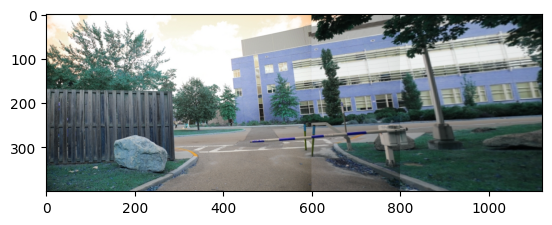

In [42]:
img_1 = cv2.imread("images/sr.jpg")
img_2 = cv2.imread("images/sm.jpg")
img_3 = cv2.imread("images/sl.jpg")

panor = panorama(img_2, img_3)
panor = panorama(img_1, panor[:, 0:800])
panor = crop_image(panor)
panor = panor[:, 0:panor.shape[1] - 60]
cv2.imwrite('output.jpg',panor)
plt.imshow(panor)
plt.show()